In [45]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",      # Каталог для загрузки данных
    train=True,       # Загружаем обучающий набор
    download=True,    # Скачиваем данные, если их нет
    transform=ToTensor()  # Преобразуем изображения в тензоры
)

# Что такое тензоры

test_data = datasets.FashionMNIST(
    root="data",
    train=False,      # Загружаем тестовый набор (10k) (train = true =>  60k)
    download=True,
    transform=ToTensor()
)

learning_rate = 1e-3 # Скорость обучения (0.001)
batch_size = 64 # Размер батча (количество изображений за один проход)
epochs = 5 # Количество эпох (сколько раз модель пройдет через весь датасет)

# Создаем DataLoader для удобной загрузки данных
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)



class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()  # Преобразует 28x28 картинку в вектор размером 784
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),  # Полносвязный слой (784 входа → 512 выхода)
            nn.ReLU(),              # Функция активации ReLU
            nn.Linear(512, 512),    # Еще один полносвязный слой (512 → 512)
            nn.ReLU(),
            nn.Linear(512, 10),     # Выходной слой (512 → 10, по числу классов)
        )

    # Метод forward(x) определяет, как данные проходят через сеть
    def forward(self, x):
        x = self.flatten(x)             # Преобразуем 28×28 в 784
        logits = self.linear_relu_stack(x)  # Пропускаем через слои
        return logits

# Создаем экземпляр нейросети
model = NeuralNetwork()

### Полносвязный слой (FC-layer)

- Слой нейронной сети, в котором каждый нейрон соединён со всеми нейронами предыдущего и следующего слоя.

### Функции активации 
- нужны, чтобы нейросеть могла моделировать сложные, нелинейные зависимости.
### Функция активации ReLU (Rectified Linear Unit) 
- Нужна, чтобы добавить нелинейность в модель.

Если в нейросети использовать только линейные слои (nn.Linear), то вся модель будет просто выполнять линейные преобразования. 

Это означает, что сколько бы ни было слоев, вся сеть будет эквивалентна одной линейной функции.

Это не позволяет модели находить сложные зависимости в данных!

ReLu работает следующим образом:
- x, x > 0
- 0, x <= 0

### Почему ReLu
- простая быстрая
- избегает проблемы затухающего градиента

В процессе обучения градиенты (производные ошибки по весам) передаются обратно через сеть с помощью обратного распространения ошибки (backpropagation).
Если градиенты становятся слишком маленькими (почти нулевыми), веса перестают обновляться, и сеть перестает обучаться.

- работает лучше в глубоких сетях, позволяя им обучаться быстрее. 
- Глубокая нейронная сеть (Deep Neural Network) -  это нейросеть, которая имеет несколько скрытых слоев между входным и выходным слоями.


In [46]:
# Функция потерь для задачи классификации
# Функция сравнивает предсказанные логиты с реальными метками и 
# вычисляет, насколько плохо сеть предсказала класс.
loss_fn = nn.CrossEntropyLoss()

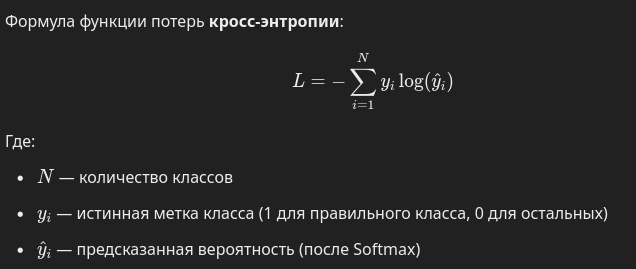

In [47]:
# Оптимизатор стохастического градиентного спуска (SGD)

# Оптимизатор отвечает за обновление весов нейросети, 
# чтобы уменьшить ошибку (функцию потерь) и обучить модель.

# model.parameters() — передаёт оптимизатору все веса сети, которые нужно обновлять.
# lr=learning_rate — задаёт скорость обучения (насколько сильно обновляются веса).

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

SGD обновляет веса модели по формуле градиентного спуска:

a - веса модели
n - шаг обновления
L - градиент функции потерь


SGD выбирает случайные мини-батчи данных и обновляет веса после каждого батча → быстрее, чем обычный градиентный спуск.


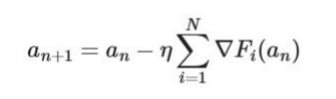

### model.train()

- Переключение модели в режим обучения важно для работы слоев, которые ведут себя по-разному в зависимости от режима: Batch normalization, Dropout

Batch Normalization (BatchNorm)

- В режиме обучения (train()): использует статистику текущего мини-батча (mean/variance) и обновляет скользящие средние.
- В режиме инференса (eval()): использует усредненную статистику, накопленную за время обучения.

Dropout

- В режиме обучения (train()): случайно зануляет часть нейронов для регуляризации.
- В режиме инференса (eval()): все нейроны активны.

В данной ситуации это неважно, так как у нас нет слоёв которые ведут себя по-разному в режимах train и eval. Поэтому вызов этого метода не оказывает эффекта.


### Как происходит предсказание:

- model(X) вызывает метод forward модели. Этот метод описывает как данные должны пройти через слои сети.
- Шаги внутри forward:
1. x = self.flatten(x) — сначала входной тензор с изображениями формы (batch_size, 28, 28) преобразуется в одномерный вектор для подачи в полносвязные слои.
2. logits = self.linear_relu_stack(x) — затем этот одномерный вектор проходит через несколько полносвязных слоев
3. Первый слой преобразует входной вектор размером 784 в вектор размером 512.
4. Второй слой делает то же самое, но на выходе всё ещё остаётся 512.
5. Третий слой преобразует этот вектор в вектор размером 10, который представляет собой логиты для 10 классов (один для каждого класса).
6. Логиты — это не нормированные вероятности, которые могут быть как положительными, так и отрицательными.
Чтобы преобразовать эти логиты в вероятности, обычно применяется функция активации, такая как Softmax, но так как используется CrossEntropyLoss, Softmax применяется внутри этой функции потерь. То есть, модель возвращает логиты для каждого из 10 классов.

### Математическое представление операции в слое

1. Пусть входной вектор данных x имеет размерность 784, то есть для каждого изображения с размером 28×28 (784 пикселя) на вход в нейронную сеть подается одномерный вектор из 784 элементов.

2. Каждый слой нейронной сети имеет свои веса WW и смещение bb. Веса — это параметры, которые сеть обучает, чтобы минимизировать ошибку.

3. Пусть веса слоя WW имеют размерность (512,784)(512,784), где 512 — количество нейронов в данном слое, а 784 — размерность входных данных (столько признаков у каждого входа).

4. Каждый нейрон в слое выполняет линейное преобразование входных данных:
    y=W⋅x+b
    y - выход нейрона(размерности 512)
    W - матрица весов размеров (512, 784)
    x - входной вектор размерности (784)
    b - вектор смещений размерности 512

5. После вычисления линейной трансформации применяется функция активации - ReLU

### Как работает нейрон

Каждый из 512 нейронов в скрытом слое обрабатывает входные данные с помощью линейной комбинации. Это означает, что каждый нейрон получает взвешенную сумму входных данных.

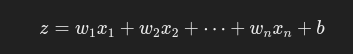


- zi​ — это результат линейной комбинации, который затем будет передан через функцию активации.


Каждый нейрон создает одно значение ai​, которое является результатом его вычислений.
Все эти значения a1​,a2​,…,a512​ составляют выходной вектор этого слоя.


В контексте машинного обучения и нейронных сетей, тензор — это основная структура данных, которая используется для представления и обработки информации.

### Обратное распространение ошибки (backpropagation)

- алгоритм, который используется для обучения нейронных сетей.

- Он позволяет вычислить градиенты для всех параметров модели (весов и смещений) и таким образом корректировать их для минимизации ошибки.

- Градиенты показывают, насколько ошибка изменится, если будет изменен тот или иной параметр. Это позволяет сети "понимать", какие параметры нужно скорректировать и на сколько, чтобы уменьшить ошибку.

- Градиент — это вектор частных производных функции по её параметрам. Он показывает, как функция изменяется при изменении параметров в разных направлениях.

Предположим, что у нас есть функция потерь L, которая зависит от параметров модели. У нейронной сети параметры модели это веса и смещения.
Мы хотим минимизировать L, изменяя параметры в нужном направлении. Для этого мы должны вычислить градиент функции потерь относительно параметров модели.

Важным параметром на данном шаге является скорость обучения n, так как может произойти следующая ситуация:
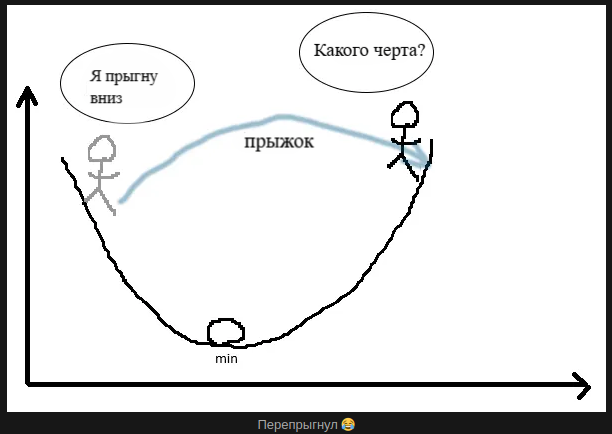



Таким образом, обратное распространение — это вычисление производной сложной функции, которое по сути отражает, как изменяется потеря (ошибка), когда мы слегка изменяем веса, а затем изменение весов в направлении уменьшения потерь маленькими шагами. Этот процесс итеративен и продолжается до тех пор, пока ошибка не станет приемлемой.

### Инициализация весов W 

- Веса в нейронной сети инициализируются случайным образом, чтобы модель не была симметричной.

- Если бы все веса были одинаковыми, сеть не могла бы научиться различать различные признаки.

У нас явно метод инициализации весов не указан, но 

- Инициализация весов по умолчанию в PyTorch для nn.Linear зависит от функции активации. Если используется ReLU, то по умолчанию используется метод Хе (He) для инициализации весов.

##### Смещения инициализируются нулевыми значениями по умолчанию.

Смещение добавляется к линейной комбинации входных сигналов и весов. Это параметр, который помогает модели адаптироваться и делать предсказания, даже если все входы равны нулю.

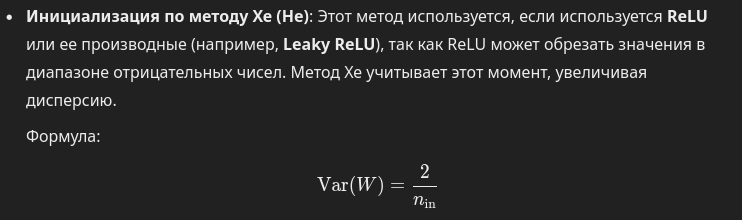


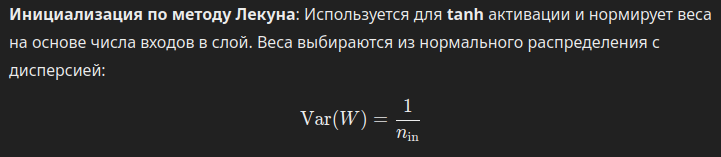

In [48]:
# Эта функция обучает модель на одной эпохе
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset) # общее кол-во примеров в датасете
    sum_loss = 0 # переменная для накопления ошибки за эпоху
    
    model.train()

    # Цикл обучения (итерация по батчам)
    for batch, (X, y) in enumerate(dataloader):

        pred = model(X) # сеть делает предсказание
        loss = loss_fn(pred, y) # считаем ошибку.
        sum_loss += loss.item() # накапливаем сумму ошибок (для статистики).

        loss.backward() # вычисляет градиенты (как менять веса, чтобы уменьшить ошибку).
        optimizer.step() # обновляет веса модели.
        optimizer.zero_grad() # очищает старые градиенты (иначе они накапливаются).

        # Каждые 100 батчей выводим loss и progress.
        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [49]:
# цикл тестирования модели, который используется для оценки её производительности после обучения
# Она запускается после завершения этапа обучения и проверяет, 
# как хорошо модель работает на тестовых данных, которые не использовались для обучения


def test_loop(dataloader, model, loss_fn):
    
    model.eval() # необязатательно, так как нет чувствительных слоёв

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # correct — переменная для подсчёта количества правильных предсказаний.
    # test_loss — переменная для хранения суммарной потери (ошибки) на тестовых данных.


    # отключаем вычисление градиентов
    # Во время тестирования нам не нужны градиенты, 
    # поскольку мы не обновляем веса модели, а просто оцениваем её производительность.
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # pred.argmax(1) == y сравнивает предсказанный класс с истинным классом. 
    # argmax(1) находит индекс с максимальной вероятностью 
    # для каждого предсказания (класс, который модель считает наиболее вероятным). 
    # Если предсказанный класс совпадает с истинным, то это правильно классифицированный пример. 

    test_loss /= num_batches # средняя ошибка
    correct /= size # точность
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [50]:
# функция run_training выполняет процесс обучения и оценки модели на протяжении нескольких эпох

def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    # списки для хранения потерь
    test_loss = [] 
    train_loss = []
    
    # цикл по эпохам
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        
        # обучение
        sum_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        train_loss.append(sum_loss)

        # тест
        acc, avg_loss = test_loop(test_dataloader, model, loss_fn)
        test_loss.append(avg_loss)
    print("Done!")
    
    return test_loss

In [51]:
# задаём гиперпараметры
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
learning_rate = 1e-3
batch_size = 64
epochs = 50

In [52]:
# процесс обучения и тестирования модели с использованием метода оптимизации SGD

test_loss_sgd = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.299545  [   64/60000]
loss: 2.294327  [ 6464/60000]
loss: 2.278661  [12864/60000]
loss: 2.274245  [19264/60000]
loss: 2.253708  [25664/60000]
loss: 2.230099  [32064/60000]
loss: 2.233909  [38464/60000]
loss: 2.202997  [44864/60000]
loss: 2.198586  [51264/60000]
loss: 2.176272  [57664/60000]
Test Error: 
 Accuracy: 54.3%, Avg loss: 2.169587 

Epoch 2
-------------------------------
loss: 2.176164  [   64/60000]
loss: 2.161150  [ 6464/60000]
loss: 2.120125  [12864/60000]
loss: 2.131189  [19264/60000]
loss: 2.071859  [25664/60000]
loss: 2.033770  [32064/60000]
loss: 2.045851  [38464/60000]
loss: 1.977618  [44864/60000]
loss: 1.980811  [51264/60000]
loss: 1.911808  [57664/60000]
Test Error: 
 Accuracy: 57.7%, Avg loss: 1.911414 

Epoch 3
-------------------------------
loss: 1.941727  [   64/60000]
loss: 1.900577  [ 6464/60000]
loss: 1.811643  [12864/60000]
loss: 1.838384  [19264/60000]
loss: 1.717780  [25664/60000]
loss: 1.695679  [32064/600

In [53]:
print(test_loss_sgd)

# Список потерь
# [2.1416783621356745, 1.8523956795406948, 1.4995636454053745,
#  1.255860953573968, 1.0988762750747099]

[2.169586833115596, 1.911413780443228, 1.548234111943822, 1.279139635669198, 1.108318692180002, 0.9970670809411699, 0.9212908349978696, 0.8670908231644114, 0.8263830914618863, 0.7944512044548229, 0.7682735938934764, 0.7458910571921403, 0.7261635363101959, 0.7083487089272518, 0.6919807546837314, 0.6768225463712292, 0.6627516843331088, 0.6496774990847156, 0.6375316711747723, 0.6262737294291235, 0.6158655414915388, 0.6062445002756301, 0.5973472731887914, 0.5891145697444867, 0.581498128972995, 0.5744462366316728, 0.567913304278805, 0.5618480939394349, 0.5562056293533106, 0.5509470346247315, 0.5460364736948803, 0.5414366725903408, 0.5371229185420237, 0.5330644094260635, 0.5292429105871043, 0.525637526800678, 0.5222296388285934, 0.51899915421085, 0.5159371778084214, 0.5130303841867264, 0.5102614574371629, 0.5076175314985263, 0.505095947510118, 0.5026770144890828, 0.5003604647839904, 0.49813321080936745, 0.4959948825988041, 0.49393377922902443, 0.49195882165507904, 0.4900547455830179]


In [54]:
# В этой строке кода создается и запускается обучение модели 
# с использованием другого оптимизатора — RMSprop, 
# который является улучшенной версией стохастического градиентного спуска (SGD)

model = NeuralNetwork()

# это оптимизатор, который использует метод Root Mean Square Propagation 
# для обновления весов модели. Он является улучшенной версией SGD и часто используется для задач,
# где данные могут быть более шумными или нелинейными.
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)

#optimizer = torch.optim.RMSprop(model.parameters(), alpha = 0.9)

# alpha - это параметр, который контролирует экспоненциальное сглаживание предыдущих градиентов. 
# Он помогает оптимизатору учитывать не только текущие градиенты,
# но и прошлые, для более стабильного обновления весов.

# Обучение с RMSprop
test_loss_rms = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.291598  [   64/60000]
loss: 0.573272  [ 6464/60000]
loss: 0.453508  [12864/60000]
loss: 0.487016  [19264/60000]
loss: 0.448582  [25664/60000]
loss: 0.455115  [32064/60000]
loss: 0.402306  [38464/60000]
loss: 0.491216  [44864/60000]
loss: 0.580400  [51264/60000]
loss: 0.399514  [57664/60000]
Test Error: 
 Accuracy: 82.4%, Avg loss: 0.463580 

Epoch 2
-------------------------------
loss: 0.276282  [   64/60000]
loss: 0.338245  [ 6464/60000]
loss: 0.322042  [12864/60000]
loss: 0.360617  [19264/60000]
loss: 0.338438  [25664/60000]
loss: 0.406122  [32064/60000]
loss: 0.280427  [38464/60000]
loss: 0.426589  [44864/60000]
loss: 0.407464  [51264/60000]
loss: 0.370292  [57664/60000]
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.440606 

Epoch 3
-------------------------------
loss: 0.235037  [   64/60000]
loss: 0.336675  [ 6464/60000]
loss: 0.252657  [12864/60000]
loss: 0.341366  [19264/60000]
loss: 0.310397  [25664/60000]
loss: 0.430595  [32064/600

In [55]:
test_loss_rms

[0.463579713823689,
 0.4406055203478807,
 0.4194770583491417,
 0.4175156091998337,
 0.4254575263542734,
 0.4608773321482786,
 0.44318184826024776,
 0.48287882888393036,
 0.4716081406660141,
 0.5414297893453556,
 0.49960639612500074,
 0.5190504967786704,
 0.5445604741952981,
 0.5970675935790797,
 0.5853310007198601,
 0.6492708324436929,
 0.629733395424618,
 0.6394159785845572,
 0.6248657006746644,
 0.8597384679374421,
 0.7205646141983901,
 0.7547733162523834,
 0.7674577556503047,
 0.6878995638174615,
 0.6715838626786402,
 0.7810558078300421,
 0.8291265798412311,
 0.9660497599156799,
 0.8275472766179948,
 0.8709236499230573,
 0.8972601094728063,
 0.8863748117427158,
 0.8654754808184447,
 0.9514397919937304,
 1.0944747743523044,
 1.1162446099956325,
 1.0349279814370118,
 1.0104922255987574,
 1.0117916007805023,
 0.9695945895591359,
 1.1111909691125723,
 1.1890099049326341,
 1.1874331413845347,
 1.2057662680270567,
 1.2200162529850462,
 1.2401753677304383,
 1.1580265718185978,
 1.288979157

In [56]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

Надо узнать про 
- SGD
- RSMprop
- adadelta
- adam

In [64]:
# Обучение с adadelta
model_adadelta = NeuralNetwork()
# optimizer_adadelta = torch.optim.Adadelta(model_adadelta.parameters(), lr=learning_rate)
optimizer_adadelta = torch.optim.Adadelta(model_adadelta.parameters())

train_loss_adadelta = run_training(epochs, train_dataloader, model_adadelta, loss_fn, optimizer_adadelta)
train_loss_adadelta

Epoch 1
-------------------------------
loss: 2.309547  [   64/60000]
loss: 0.601169  [ 6464/60000]
loss: 0.498797  [12864/60000]
loss: 0.559406  [19264/60000]
loss: 0.514861  [25664/60000]
loss: 0.414398  [32064/60000]
loss: 0.466719  [38464/60000]
loss: 0.510052  [44864/60000]
loss: 0.569783  [51264/60000]
loss: 0.437209  [57664/60000]
Test Error: 
 Accuracy: 81.4%, Avg loss: 0.488801 

Epoch 2
-------------------------------
loss: 0.317071  [   64/60000]
loss: 0.344510  [ 6464/60000]
loss: 0.349399  [12864/60000]
loss: 0.396431  [19264/60000]
loss: 0.376823  [25664/60000]
loss: 0.369808  [32064/60000]
loss: 0.320561  [38464/60000]
loss: 0.437412  [44864/60000]
loss: 0.456276  [51264/60000]
loss: 0.424950  [57664/60000]
Test Error: 
 Accuracy: 82.6%, Avg loss: 0.462704 

Epoch 3
-------------------------------
loss: 0.254498  [   64/60000]
loss: 0.348019  [ 6464/60000]
loss: 0.269038  [12864/60000]
loss: 0.298114  [19264/60000]
loss: 0.343318  [25664/60000]
loss: 0.350142  [32064/600

[0.48880114306689826,
 0.4627037964239242,
 0.4593202485020753,
 0.4141990066903412,
 0.4054426942851133,
 0.4247178138251517,
 0.4224691111950358,
 0.4568829897103036,
 0.4268982333552306,
 0.4418685208460328,
 0.45050912416854483,
 0.4767344945175633,
 0.48241602653151106,
 0.5703134354512402,
 0.46260730537829126,
 0.5038789981015169,
 0.5648742466215875,
 0.5631110644454409,
 0.5994554635635607,
 0.5608166771329892,
 0.5703067685578279,
 0.6037759452014212,
 0.6488230966363743,
 0.7121252821888894,
 0.6664544604481406,
 0.6971831263108238,
 0.7412161784132373,
 0.6340280774577408,
 0.7400682493095185,
 0.7740225679935164,
 0.6860226012090114,
 0.7472238262083121,
 0.7492682729272326,
 0.7778794836804603,
 0.7986266879708903,
 0.6864647961156384,
 0.8363323954829744,
 0.7987889770513318,
 0.9132893866604301,
 0.878150097883431,
 0.8463391207965316,
 0.9501683036233209,
 0.8869132388644158,
 0.8251155400826673,
 0.9037717744992797,
 0.9770144041936109,
 0.9936509981846354,
 0.8983534

In [58]:
# Обучение с adam
model_adam = NeuralNetwork()
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=learning_rate)
train_loss_adam = run_training(epochs, train_dataloader, model_adam, loss_fn, optimizer_adam)

train_loss_adam

Epoch 1
-------------------------------
loss: 2.298178  [   64/60000]
loss: 0.539993  [ 6464/60000]
loss: 0.385929  [12864/60000]
loss: 0.497904  [19264/60000]
loss: 0.454559  [25664/60000]
loss: 0.457968  [32064/60000]
loss: 0.378161  [38464/60000]
loss: 0.520169  [44864/60000]
loss: 0.510247  [51264/60000]
loss: 0.519006  [57664/60000]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.410636 

Epoch 2
-------------------------------
loss: 0.258917  [   64/60000]
loss: 0.356377  [ 6464/60000]
loss: 0.297691  [12864/60000]
loss: 0.388704  [19264/60000]
loss: 0.407276  [25664/60000]
loss: 0.360071  [32064/60000]
loss: 0.328383  [38464/60000]
loss: 0.504849  [44864/60000]
loss: 0.433394  [51264/60000]
loss: 0.480005  [57664/60000]
Test Error: 
 Accuracy: 85.2%, Avg loss: 0.401098 

Epoch 3
-------------------------------
loss: 0.216885  [   64/60000]
loss: 0.317400  [ 6464/60000]
loss: 0.254028  [12864/60000]
loss: 0.326640  [19264/60000]
loss: 0.366768  [25664/60000]
loss: 0.338181  [32064/600

[0.410635973237882,
 0.40109839352073184,
 0.37619744582920317,
 0.36185301175922346,
 0.35277796797691635,
 0.3451811003077562,
 0.3463999859656498,
 0.3497924173523666,
 0.36427912799416073,
 0.36870330818899116,
 0.40074136468825067,
 0.3853434384533554,
 0.43074134447772033,
 0.40515108145536133,
 0.4239152164975549,
 0.39172181259294986,
 0.40345644751551807,
 0.4212784370656606,
 0.4677416636685657,
 0.473280537565043,
 0.5303454920174969,
 0.5204612068404817,
 0.5439440881608019,
 0.5263651047542597,
 0.6038372606561062,
 0.5454665649545848,
 0.5578691463941222,
 0.6071887100767938,
 0.6001693460212392,
 0.6981182699477312,
 0.6647481223817464,
 0.685749988350424,
 0.6654409113678204,
 0.7246964128071051,
 0.6542406846312391,
 0.713755953573521,
 0.6866776259841433,
 0.7300972821321458,
 0.7333228683846581,
 0.7946517783451446,
 0.7531007512407318,
 0.8183955662189775,
 0.8023753309067024,
 0.8249201208269995,
 0.9029201263455069,
 0.8074301403130043,
 0.863073806600218,
 0.9154

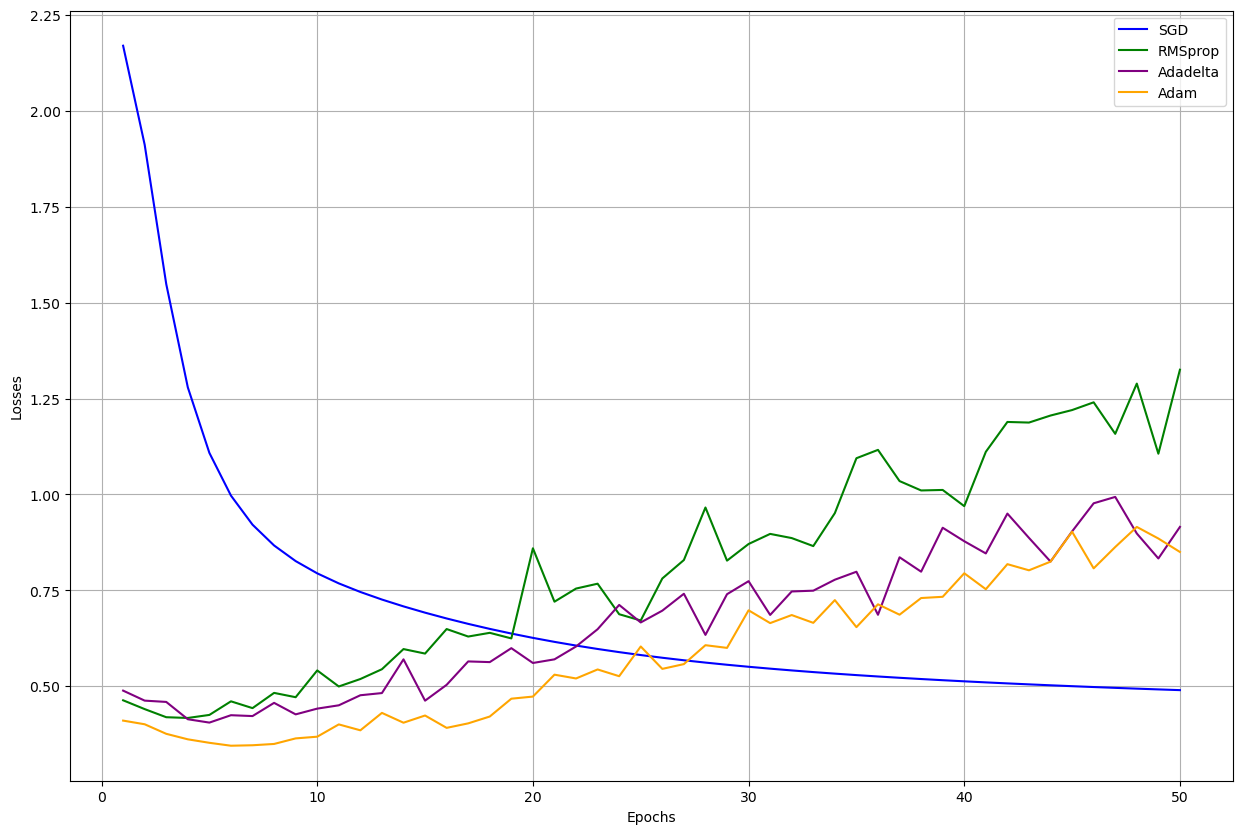

In [65]:
import matplotlib.pyplot as plt

# Построение графика
plt.figure(figsize=(15, 10))
plt.plot(range(1, epochs + 1), test_loss_sgd,       label="SGD",      color = "blue")
plt.plot(range(1, epochs + 1), test_loss_rms,       label="RMSprop",  color = "green")
plt.plot(range(1, epochs + 1), train_loss_adadelta, label="Adadelta", color = "purple")
plt.plot(range(1, epochs + 1), train_loss_adam,     label="Adam",     color = "orange")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.grid(True)
plt.show()

#### Выводы

- SGD показывает стабильное и плавное уменьшение ошибки, обучение медленное но устойчивое, без резких скачков. 
- RMSprop быстро страновится нестабильным, в поздних эпохах разброс значений и ошибка растёт - видим проблему со сходимостью
- Adam показал самый быстрый спад ошибки в начале обучения, но после 20й эпохи ведёт себя не устойчиво
- Adadelta также обучается медленно но стабильно, почти долнал SGD к 50й эпохе - это при явном указании скорости обучения, а если её не указывать, то до 20й эпохи он показывает приемлемое поведение, после становится аналогичен методу Adam



### Особенности RMS
- SGD, который использует фиксированную скорость обучения (learning rate), RMSprop подстраивает скорость для каждого параметра индивидуально.
    - Если градиенты меняются сильно — скорость обучения уменьшается.
    - Если градиенты маленькие — скорость обучения остаётся выше.

- RMSprop делит градиенты на их усреднённое квадратное значение, предотвращая резкие скачки обновлений. Больший вес – у последних градиентов

- Он часто используется в моделях обработки последовательностей, например, в анализе текста и речи, так как помогает бороться с исчезающими градиентами.

- RMSprop может слишком сильно уменьшать скорость обучения, если градиенты очень маленькие. В таких случаях лучше использовать Adam, который сочетает RMSprop и моментум.

### Особенности Adadelta

- Adadelta — это адаптивный оптимизатор, созданный для устранения недостатков RMSprop и Adagrad
- В отличие от SGD, RMSprop и Adam, где надо вручную задавать learning rate Adadelta автоматически настраивает его на основе прошлых обновлений градиента.
- Запоминает только последние градиенты. Adadelta не хранит всю историю градиентов, как Adagrad (который сильно замедляет обучение). Вместо этого он динамически обновляет скорость обучения, основываясь только на нескольких последних шагах.

### Особенности Adam
- Adam — это адаптивный оптимизатор, который объединяет лучшие идеи RMSprop и Momentum.
- Использует ускорение градиента из Momentum для плавных обновлений.
- Использует адаптивные скорости обучения из RMSprop для контроля шага обновления.

- Adam может перескакивать минимум, если learning rate слишком большой.


Adadelta с заданной скоростью обучения

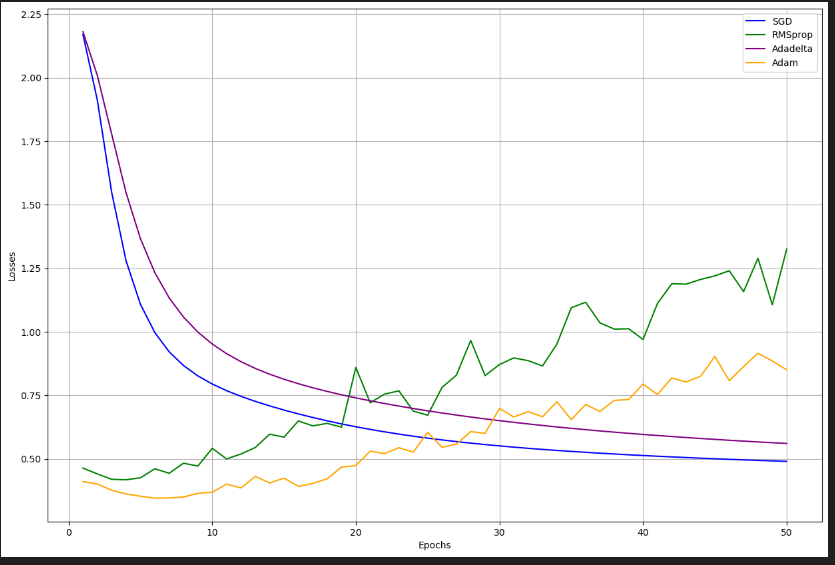

Adadelta без явного указания скорости обучения

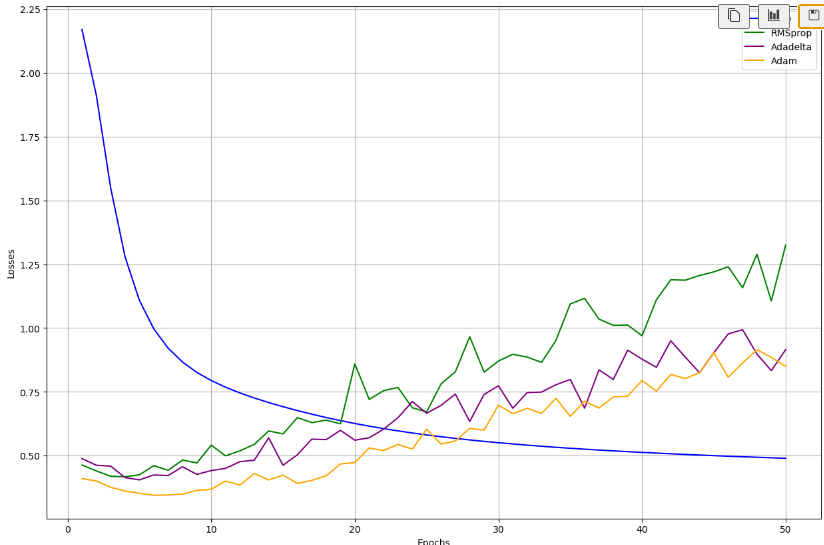

# Трудности при оптимизации градиентного спуска

На каждой итерации алгоритм градиентного спуска работает, "озираясь по всем направлениям, находя самый перспективный уклон, по которому можно спуститься вниз". Но что произойдёт, если алгоритм выберет лучший, по его мнению, уклон, но это будет не лучшее направление?


#### Локальные минимумы

- На стандартной кривой потерь, кроме глобального минимума, может встретиться множество локальных минимумов. Главной задачей алгоритма градиентного спуска, как следует из его названия, является спуск всё ниже и ниже. Но, стоит ему спуститься до локального минимума — и подняться оттуда наверх часто становится непосильной задачей. Алгоритм может просто застрять в локальном минимуме, так и не попав на глобальный минимум.

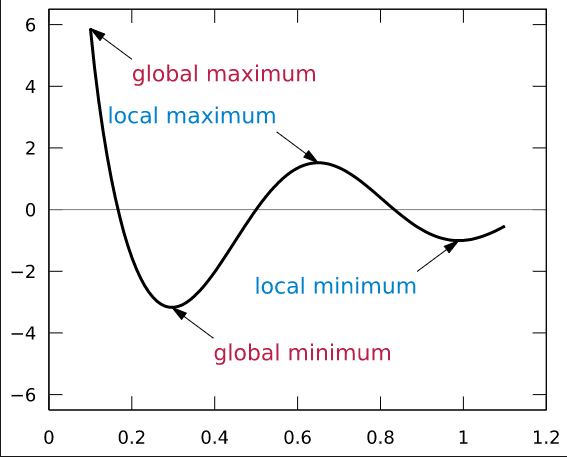

#### Седловые точки

- Ещё одной важной проблемой является прохождение алгоритмом "седловых точек". Седловой называют точку, в которой в одном направлении, соответствующем одному параметру, кривая находится на локальном минимуме; во втором же направлении, соответствующем другому параметру, кривая находится на локальном максимуме.

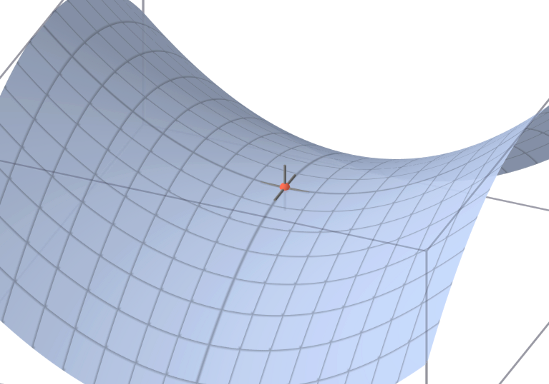


- Опасность в том, что область, непосредственно окружающая седловую точку, как правило, довольно плоская, она напоминает плато. Плоская область означает практически нулевые градиенты. Оптимизатор начинает колебаться вокруг седловой точки в направлении первого параметра, не “догадываясь” спуститься вниз по уклону в направлении второго параметра.

- Алгоритм градиентного спуска при этом ошибочно полагает, что минимум им найден.

#### Овраги

- Ещё одна головная боль алгоритма градиентного спуска — пересечение оврагов. 

- Овраг — это протяжённая узкая долина, имеющая крутой уклон в одном направлении (т.е. по сторонам долины) и плавный уклон в другом (т.е. вдоль долины). Довольно часто овраг приводит к минимуму. Поскольку навигация по такой форме кривой затруднена, такую кривую часто называют патологическим искривлением.

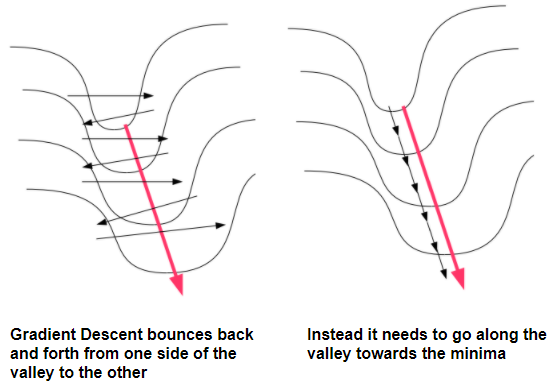

- Представьте узкую речную долину, плавно спускающуюся с холмов и простирающуюся вниз до озера. Вам нужно быстро спуститься вниз по реке, туда, где пролегает долина. Но алгоритм градиентного спуска вполне может начать движение, отталкиваясь попеременно от сторон долины, при этом движение вниз по направлению реки будет весьма медленным.


# Решаем проблемы GD

### Стохастический градиентный спуск SGD (Stochastic Gradient Descent)

- Промежуточный стохастический градиентный спуск с мини-пакетами — вариант, при котором коэффициенты меняются после обсчета N элементов выборки, то есть для каждой тренировочной итерации алгоритм выбирает случайное подмножество набора данных

- Случайность выбора хороша тем, что она помогает глубже исследовать ландшафт потерь.

- Если начать изменять входные данные, выбирая различные данные в каждом мини-пакете, значения потерь и градиентов также будут меняться. Другими словами, изменяя набор входных данных, для каждого мини-пакета мы получим собственную кривую потерь, которая немного отличается от других.

- Другими словами: каждый мини-батч данных немного отличается, поэтому градиенты и потери тоже будут разными на каждом шаге. Из-за этого обучение в SGD немного нестабильно: потери не всегда уменьшаются плавно, а могут «скакать».

- Даже если алгоритм застрянет на каком-либо месте ландшафта в одном мини-пакете, можно будет запустить другой мини-пакет с другим ландшафтом, и вполне вероятно, что алгоритм сможет двигаться дальше. Данная техника предотвращает застревание алгоритма на определённых участках ландшафта, особенно на ранних этапах тренировки.

- SGD быстрее, чем обычный градиентный спуск, потому что работает с небольшими частями данных, а не со всем набором сразу.

### Накопление импульса

- Один из интересных аспектов алгоритма градиентного спуска связан с его поведением на крутых уклонах.

- Так как градиент на крутых уклонах большой, алгоритм в этих местах может делать большие шаги, между тем, именно здесь вы на самом деле хотите перемещаться медленно и осторожно. Это может привести к тому, что алгоритм будет "скакать" назад и вперёд, замедляя тем самым процесс тренировки.

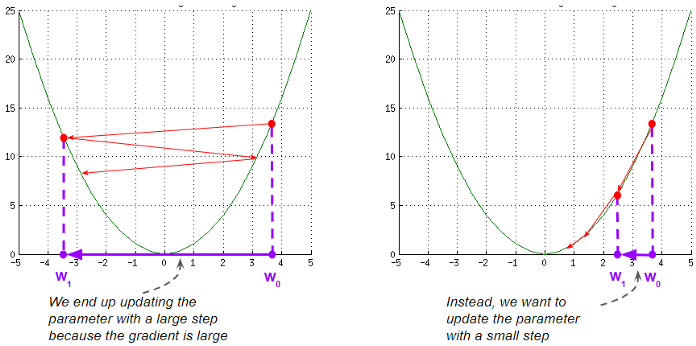

- В идеале частоту обновлений хочется изменять динамически, чтобы алгоритм мог подстраиваться под изменения окружающего ландшафта. Если уклон очень крутой, алгоритм должен притормаживать. Если склон довольно пологий, скорость вполне можно повысить, и так далее.

Алгоритм градиентного спуска обновляет веса на каждом шаге, используя в качестве параметров значения градиента и скорости обучения. Таким образом, для изменения количества обновлений можно выполнить два действия:

- Скорректировать градиент.

- Скорректировать значение скорости обучения.

### SGD с функцией накопления импульса и обычный SGD

- Корректировка градиента, выполняется с помощью функции накопления импульса.

- В SGD учитывается только текущее значение градиента, а значения всех прошлых градиентов игнорируются. Это означает, что, если алгоритм внезапно натолкнётся на аномалию на кривой потерь, он может пойти не по нужной траектории.

- С другой стороны, при использовании SGD с накоплением импульса учитываются значения прошлых градиентов, общее направление сохраняется, и траектория остаётся правильной. Это позволяет использовать знания об окружающем ландшафте, полученные алгоритмом до того, как он добрался до данной точки, и смягчить эффект аномалии кривой потерь.

- Функция накопления импульса помогает решить проблему узкого оврага с патологическим искривлением, градиент которого, с одной стороны, очень большой для одного весового параметра, а, с другой стороны, очень маленький для другого параметра.

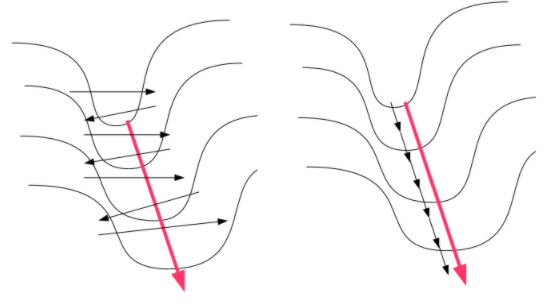

### Изменение скорости обучения

- Вторым способом изменения количества обновлений параметров является изменение скорости обучения.

- Чтобы выбрать скорость обучения для данного параметра, мы можем обратиться к прошлым градиентам.

- Данная функциональность реализована в нескольких алгоритмах оптимизации, использующих разные, но похожие методы, например Adagrad, Adadelta, RMS Prop.

    - Например, метод Adagrad возводит в квадрат значения прошлых градиентов и суммирует их в равных весовых пропорциях. 

    - Метод RMSProp также возводит в квадрат значения прошлых градиентов, но приводит их к экспоненциальному скользящему среднему, тем самым придавая более высокую значимость последним по времени градиентам.

- После возведения градиентов в квадрат все они становятся положительными, то есть получают одно и то же направление. Таким образом, перестаёт действовать эффект, проявляющийся при применении функции накопления импульса.

- Это означает, что для параметра с крутым уклоном значения градиентов будут большими, и возведение таких значений в квадрат даст ещё большее и всегда положительное значение, поэтому такие градиенты быстро накапливаются.

- Для погашения данного эффекта алгоритм рассчитывает скорость обучения посредством деления накопленных квадратов градиентов на коэффициент с большим значением. За счет этого алгоритм “притормаживает” на крутых уклонах.

- Рассуждая аналогично, если уклоны небольшие, накопления также будут небольшими, поэтому при вычислении скорости обучения алгоритм разделит накопленные квадраты градиентов на коэффициент с меньшим значением. Таким образом, скорость обучения на пологих склонах будет увеличена.


##### Некоторые алгоритмы оптимизации используют сразу оба подхода — изменяют скорость обучения, как это описано выше, и меняют градиент с помощью функции накопления импульса. Так поступает, например, алгоритм Adam и его многочисленные варианты, а также алгоритм LAMB.